In [ ]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=CRYPTO_INTRADAY&symbol=BCH&market=USD&interval=5min&apikey=1WVHMIDY93DFVPB5'
r = requests.get(url)
data = r.json()

print(data)

{'Information': 'Thank you for using Alpha Vantage! This is a premium endpoint. You may subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly unlock all premium endpoints'}


In [ ]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import indicators
import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

# Check TensorFlow version
print("TensorFlow Version: ", tf.__version__)

TensorFlow Version:  2.15.0


# Bitcoin 5-min data loading

In [ ]:
def data_preprocess(file_name):
    data = pd.read_csv(file_name)
    data = data.sort_values(by = ['date'], ascending = True, ignore_index = True)
    data_5min = data[data['date'].str[-4:-3].isin(['0', '5'])]
    return data_5min

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_2122_5min = data_preprocess('/content/drive/My Drive/Colab Notebooks/BTC-2021min.csv')
data_20_5min = data_preprocess('/content/drive/My Drive/Colab Notebooks/BTC-2020min.csv')
data_19_5min = data_preprocess('/content/drive/My Drive/Colab Notebooks/BTC-2019min.csv')
data_18_5min = data_preprocess('/content/drive/My Drive/Colab Notebooks/BTC-2018min.csv')
data_17_5min = data_preprocess('/content/drive/My Drive/Colab Notebooks/BTC-2017min.csv')

In [ ]:
quarter_size = len(data_2122_5min) // 4
start_index = 3 * quarter_size

last_quarter_data = data_2122_5min.iloc[start_index:]

In [ ]:
last_quarter_data

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
458089,1636944600,2021-11-15 02:50:00,BTC/USD,65709.77,65709.77,65709.77,65709.77,0.000000,0.000000
458094,1636944900,2021-11-15 02:55:00,BTC/USD,65760.39,65760.39,65704.97,65708.28,0.130108,8549.166323
458099,1636945200,2021-11-15 03:00:00,BTC/USD,65702.67,65739.28,65702.67,65739.28,0.025233,1658.785447
458104,1636945500,2021-11-15 03:05:00,BTC/USD,65703.94,65703.94,65703.94,65703.94,0.007231,475.101905
458109,1636945800,2021-11-15 03:10:00,BTC/USD,65714.59,65739.17,65714.59,65739.17,0.416955,27410.288775
...,...,...,...,...,...,...,...,...,...
610759,1646104800,2022-03-01 03:20:00,BTC/USD,42982.96,42984.45,42982.96,42984.45,0.262610,11288.146415
610764,1646105100,2022-03-01 03:25:00,BTC/USD,43018.57,43018.57,43002.30,43002.30,0.001270,54.632702
610769,1646105400,2022-03-01 03:30:00,BTC/USD,43065.82,43106.72,43065.82,43093.52,0.313050,13490.426005
610774,1646105700,2022-03-01 03:35:00,BTC/USD,43098.34,43098.42,43083.17,43083.17,0.609030,26238.943025


In [ ]:
last_quarter_data_after = last_quarter_data[:-4]

In [ ]:
last_quarter_data_after

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
458089,1636944600,2021-11-15 02:50:00,BTC/USD,65709.77,65709.77,65709.77,65709.77,0.000000,0.000000
458094,1636944900,2021-11-15 02:55:00,BTC/USD,65760.39,65760.39,65704.97,65708.28,0.130108,8549.166323
458099,1636945200,2021-11-15 03:00:00,BTC/USD,65702.67,65739.28,65702.67,65739.28,0.025233,1658.785447
458104,1636945500,2021-11-15 03:05:00,BTC/USD,65703.94,65703.94,65703.94,65703.94,0.007231,475.101905
458109,1636945800,2021-11-15 03:10:00,BTC/USD,65714.59,65739.17,65714.59,65739.17,0.416955,27410.288775
...,...,...,...,...,...,...,...,...,...
610739,1646103600,2022-03-01 03:00:00,BTC/USD,43160.97,43161.72,43160.97,43161.21,0.006174,266.494575
610744,1646103900,2022-03-01 03:05:00,BTC/USD,43105.61,43108.71,43059.49,43088.70,0.079994,3446.834882
610749,1646104200,2022-03-01 03:10:00,BTC/USD,43066.59,43088.90,43066.59,43088.90,0.026503,1141.992011
610754,1646104500,2022-03-01 03:15:00,BTC/USD,42986.75,42986.98,42986.75,42986.98,0.007710,331.429616


# Data Preprocessing and Clean up

In [ ]:
# Checking for missing values
last_quarter_data.isnull().sum()

# Filling missing values, if any
# data_all.fillna(method='ffill', inplace=True)

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

# Feature Selection and Normalization

In [ ]:
# Ref: Advanced Stock Pattern Prediction using LSTM with the Attention Mechanism in TensorFlow: A step by step Guide with Apple Inc. (AAPL) Data
# Deciding Features: For our model, we’ll use ‘Close’ prices, but you can experiment with additional features like ‘Open’, ‘High’, ‘Low’, and ‘Volume’.

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(last_quarter_data_after['close'].values.reshape(-1,1))
# data_scaled_open = scaler.fit_transform(data_all['open'].values.reshape(-1,1))
# data_scaled_high = scaler.fit_transform(data_all['high'].values.reshape(-1,1))
# data_scaled_low = scaler.fit_transform(data_all['low'].values.reshape(-1,1))

# Creating Sequences

In [ ]:
# LSTM models require input to be in a sequence format. We transform the data into sequences for the model to learn from.

X = []
y = []

for i in range(60, len(data_scaled)):
    X.append(data_scaled[i-60:i, 0])
    y.append(data_scaled[i, 0])

# Train-Test Split

In [ ]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshaping Data for LSTM

In [ ]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building the LSTM with Attention Model

# Creating LSTM Layers

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, AdditiveAttention, Permute, Reshape, Multiply


model = Sequential()

# Adding LSTM layers with return_sequences=True
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))

# Integrating the Attention Mechanism

In [ ]:
# Adding self-attention mechanism
# The attention mechanism
attention = AdditiveAttention(name='attention_weight')
# Permute and reshape for compatibility
model.add(Permute((2, 1)))
model.add(Reshape((-1, X_train.shape[1])))
attention_result = attention([model.output, model.output])
multiply_layer = Multiply()([model.output, attention_result])
# Return to original shape
model.add(Permute((2, 1)))
model.add(Reshape((-1, 50)))

# Adding a Flatten layer before the final Dense layer
model.add(tf.keras.layers.Flatten())

# Final Dense layer
model.add(Dense(1))

# Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
# history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)

# Optimizing the Model

In [ ]:
from keras.layers import BatchNormalization

# Adding Dropout and Batch Normalization
model.add(Dropout(0.2))
model.add(BatchNormalization())

# Model Compilation

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

# Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 permute (Permute)           (None, 50, 60)            0         
                                                                 
 reshape (Reshape)           (None, 50, 60)            0         
                                                                 
 permute_1 (Permute)         (None, 60, 50)            0         
                                                                 
 reshape_1 (Reshape)         (None, 60, 50)            0         
                                                                 
 flatten (Flatten)           (None, 3000)              0

# Training the Model (Avoid Overfitting)

In [ ]:
# Validation Set: Using a validation set (as we did in the training code) helps in monitoring the model’s performance on unseen data.
# Early Stopping: This technique stops training when the model’s performance on the validation set starts to degrade. Implementing early stopping in Keras is straightforward:

from keras.callbacks import  EarlyStopping

Early_stopping  = EarlyStopping(monitor= 'val_loss' , patience= 10 )
History = model.fit(X_train, y_train, epochs= 100 , batch_size= 25 ,validation_split= 0.2 , callbacks=[Early_stopping])

Epoch 1/100
781/781 [==============================] - 54s 63ms/step - loss: 0.0763 - val_loss: 0.0024
Epoch 2/100
781/781 [==============================] - 48s 62ms/step - loss: 0.0083 - val_loss: 0.0279
Epoch 3/100
781/781 [==============================] - 48s 61ms/step - loss: 0.0078 - val_loss: 0.0030
Epoch 4/100
781/781 [==============================] - 47s 60ms/step - loss: 0.0081 - val_loss: 4.5448e-04
Epoch 5/100
781/781 [==============================] - 47s 60ms/step - loss: 0.0078 - val_loss: 0.0032
Epoch 6/100
781/781 [==============================] - 48s 61ms/step - loss: 0.0080 - val_loss: 3.3713e-04
Epoch 7/100
781/781 [==============================] - 48s 62ms/step - loss: 0.0082 - val_loss: 0.0089
Epoch 8/100
781/781 [==============================] - 48s 62ms/step - loss: 0.0077 - val_loss: 0.0011
Epoch 9/100
781/781 [==============================] - 48s 62ms/step - loss: 0.0079 - val_loss: 0.0011
Epoch 10/100
781/781 [==============================] - 48s 61ms/

# Evaluating Model Performance
## Evaluating with the Test Set


In [ ]:
# Convert X_test and y_test to Numpy arrays if they are not already
X_test = np.array(X_test)
y_test = np.array(y_test)

# Ensure X_test is reshaped similarly to how X_train was reshaped
# This depends on how you preprocessed the training data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Now evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)

191/191 [==============================] - 3s 18ms/step - loss: 0.0017
Test Loss:  0.0017237424617633224


# Performance Metrics

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Making predictions
y_pred = model.predict(X_test)

# Calculating MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error: ", mae)
print("Root Mean Square Error: ", rmse)

191/191 [==============================] - 6s 24ms/step
Mean Absolute Error:  0.03767262111443065
Root Mean Square Error:  0.041517975963269976


# Predicting the Next 4 Candles
## Making Predictions

In [ ]:
# import yfinance as yf
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Fetching the last 60 sequences of data
data = last_quarter_data_after[-60:]

# Selecting the 'Close' price and converting to numpy array
closing_prices = data['close'].values

# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(closing_prices.reshape(-1,1))

# Since we need the last 60 days to predict the next day, we reshape the data accordingly
X_latest = np.array([scaled_data[-60:].reshape(60)])

# Reshaping the data for the model (adding batch dimension)
X_latest = np.reshape(X_latest, (X_latest.shape[0], X_latest.shape[1], 1))

# Making predictions for the next 4 candles
predicted_stock_price = model.predict(X_latest)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

print("Predicted Stock Prices for the next 4 days: ", predicted_stock_price)

1/1 [==============================] - 0s 27ms/step
Predicted Stock Prices for the next 4 days:  [[43084.85]]


In [ ]:
# Fetch the latest 60 days of AAPL stock data
data = last_quarter_data_after[-60:]

# Select 'Close' price and scale it
closing_prices = data['close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Predict the next 4 days iteratively
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)  # Most recent 60 days

for i in range(4):  # Predicting 4 days
    # Get the prediction (next day)
    next_prediction = model.predict(current_batch)

    # Reshape the prediction to fit the batch dimension
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)

    # Append the prediction to the batch used for predicting
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)

    # Inverse transform the prediction to the original price scale
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

print("Predicted Stock Prices for the next 4 days: ", predicted_prices)

1/1 [==============================] - 0s 41ms/step
Predicted Stock Prices for the next 4 days:  [43084.85, 43079.332, 43001.11, 42985.383]


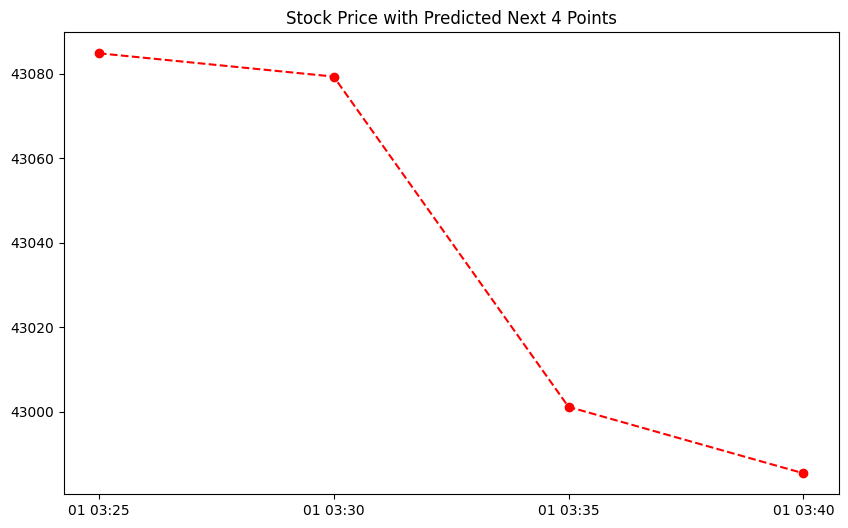

In [ ]:
import pandas as pd

import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the fetched AAPL stock data
# Make sure it contains Open, High, Low, Close, and Volume columns

# Creating a list of dates for the predictions
# Convert last_date to datetime object if it's not already
last_date = pd.to_datetime(data.date.values[-1])

# Adding 5 minutes to get the next 5-minute timestamp
next_5min = last_date + pd.Timedelta(minutes=5)

# Creating a list of dates for the predictions
prediction_datetimes = pd.date_range(start=next_5min, periods=4, freq='5T')  # Assuming 5-minute frequency

# Assuming 'predicted_prices' is your list of predicted prices for the next 4 points
predictions_df = pd.DataFrame(index=prediction_datetimes, data=predicted_prices, columns=['Close'])

# Plotting the actual data with mplfinance

# Overlaying the predicted data
plt.figure(figsize=(10,6))
plt.plot(predictions_df.index, predictions_df['Close'], linestyle='dashed', marker='o', color='red')

plt.title("Stock Price with Predicted Next 4 Points")
plt.show()


In [ ]:
import pandas as pd

import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt

last_quarter_data_after

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
458089,1636944600,2021-11-15 02:50:00,BTC/USD,65709.77,65709.77,65709.77,65709.77,0.000000,0.000000
458094,1636944900,2021-11-15 02:55:00,BTC/USD,65760.39,65760.39,65704.97,65708.28,0.130108,8549.166323
458099,1636945200,2021-11-15 03:00:00,BTC/USD,65702.67,65739.28,65702.67,65739.28,0.025233,1658.785447
458104,1636945500,2021-11-15 03:05:00,BTC/USD,65703.94,65703.94,65703.94,65703.94,0.007231,475.101905
458109,1636945800,2021-11-15 03:10:00,BTC/USD,65714.59,65739.17,65714.59,65739.17,0.416955,27410.288775
...,...,...,...,...,...,...,...,...,...
610739,1646103600,2022-03-01 03:00:00,BTC/USD,43160.97,43161.72,43160.97,43161.21,0.006174,266.494575
610744,1646103900,2022-03-01 03:05:00,BTC/USD,43105.61,43108.71,43059.49,43088.70,0.079994,3446.834882
610749,1646104200,2022-03-01 03:10:00,BTC/USD,43066.59,43088.90,43066.59,43088.90,0.026503,1141.992011
610754,1646104500,2022-03-01 03:15:00,BTC/USD,42986.75,42986.98,42986.75,42986.98,0.007710,331.429616


In [ ]:
last_quarter_data

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
458089,1636944600,2021-11-15 02:50:00,BTC/USD,65709.77,65709.77,65709.77,65709.77,0.000000,0.000000
458094,1636944900,2021-11-15 02:55:00,BTC/USD,65760.39,65760.39,65704.97,65708.28,0.130108,8549.166323
458099,1636945200,2021-11-15 03:00:00,BTC/USD,65702.67,65739.28,65702.67,65739.28,0.025233,1658.785447
458104,1636945500,2021-11-15 03:05:00,BTC/USD,65703.94,65703.94,65703.94,65703.94,0.007231,475.101905
458109,1636945800,2021-11-15 03:10:00,BTC/USD,65714.59,65739.17,65714.59,65739.17,0.416955,27410.288775
...,...,...,...,...,...,...,...,...,...
610759,1646104800,2022-03-01 03:20:00,BTC/USD,42982.96,42984.45,42982.96,42984.45,0.262610,11288.146415
610764,1646105100,2022-03-01 03:25:00,BTC/USD,43018.57,43018.57,43002.30,43002.30,0.001270,54.632702
610769,1646105400,2022-03-01 03:30:00,BTC/USD,43065.82,43106.72,43065.82,43093.52,0.313050,13490.426005
610774,1646105700,2022-03-01 03:35:00,BTC/USD,43098.34,43098.42,43083.17,43083.17,0.609030,26238.943025


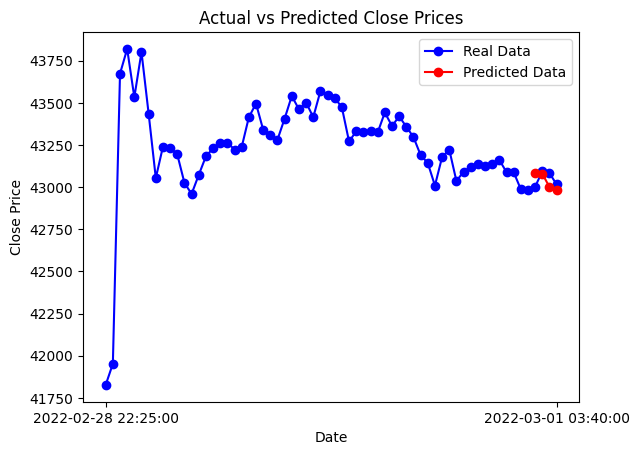

In [ ]:
import matplotlib.pyplot as plt

# Get start date and end date of the current x-axis label
start_date = last_quarter_data.date.values[-64]
end_date = last_quarter_data.date.values[-1]

# Plotting the actual close prices
plt.plot(last_quarter_data.date.values[-64:], last_quarter_data.close.values[-64:], linestyle='-', marker='o', color='blue', label='Real Data')

# Plotting the predicted close prices
plt.plot(last_quarter_data.date.values[-4:], predicted_prices, linestyle='-', marker='o', color='red', label='Predicted Data')

plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()

# Set x-axis ticks to include only start date and end date
plt.xticks([start_date, end_date], [start_date, end_date])

plt.show()



In [ ]:
predicted_prices

[43084.85, 43079.332, 43001.11, 42985.383]

In [ ]:
last_quarter_data.close.values[-4:]

array([43002.3 , 43093.52, 43083.17, 43016.03])

In [ ]:
# Calculate MAPE
absolute_percentage_errors = np.abs((predicted_prices - last_quarter_data.close.values[-4:]) / last_quarter_data.close.values[-4:])
mape = np.mean(absolute_percentage_errors) * 100

print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 0.1216525019639523
